## 轮廓
findcontour()函数  
第一个是**源图像**  
第二个是**轮廓检索模式**  
第三个是**轮廓逼近方法**  
输出等高线和层次结构。  


In [ ]:
import numpy as np
import cv2 as cv
img = cv.imread('../data/apple.jpg')
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(img, contours, -1, (0,255,0), 3)

cv.imshow('Image with Contour', img)
cv.waitKey(0)
cv.destroyAllWindows()


## 绘制轮廓
**cv.drawContours**函数  
 
第一个参数是源图像  
第二个参数是应该作为Python列表传递的轮廓  
第三个参数是轮廓的索引（在绘制单个轮廓时有用。要绘制所有轮廓，请传递-1）

In [ ]:
import cv2 as cv
import threading

# 处理视频流的线程函数
def process_video():
    global frame
    while True:
        # 读取视频帧
        ret, frame = cap.read()
        if not ret:
            break

# 创建视频捕捉对象
cap = cv.VideoCapture(0)  # 0表示默认摄像头，也可以传入视频文件路径

# 初始化滑动条的初始值
threshold1 = 0
threshold2 = 0

# 创建窗口和滑动条
cv.namedWindow('Canny Edge Detection')
cv.createTrackbar('Threshold 1', 'Canny Edge Detection', 0, 255, lambda x: None)
cv.createTrackbar('Threshold 2', 'Canny Edge Detection', 0, 255, lambda x: None)

# 创建线程对象
thread = threading.Thread(target=process_video)

# 启动线程
thread.start()

# 等待一段时间确保线程已经开始处理视频流
cv.waitKey(300)

# 主线程中处理滑动条数值变化和显示结果
while True:

    # 获取滑动条数值
    threshold1 = cv.getTrackbarPos('Threshold 1', 'Canny Edge Detection')
    threshold2 = cv.getTrackbarPos('Threshold 2', 'Canny Edge Detection')

    # 复制当前帧用于处理
    current_frame = frame.copy()

    # 在主线程中进行Canny边缘检测
    edges = cv.Canny(current_frame, threshold1, threshold2)
    
    contours, hierarchy = cv.findContours(edges, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    cv.drawContours(current_frame, contours, -1, (0,255,0), 3)

    # 显示结果
    cv.imshow('Canny Edge Detection', current_frame)

    # 按下 'q' 键退出
    if cv.waitKey(1) == 27:
        break

# 等待线程结束
#thread.join()

# 释放资源
cap.release()
cv.destroyAllWindows()


## 轮廓特征
cv.moments()是OpenCV中的一个函数，用于计算给定图像的各个矩值。矩是在图像处理中用于描述图像特征和形状的数学工具。  

该函数计算出的矩值以字典的形式返回，其中包含了一系列与图像的几何特征相关的值。这些矩值可以用于计算图像的中心点、面积、方向、边界框等。以下是返回的字典中可能包含的一些常见矩值的解释：  

1. m00：零阶矩或区域的面积。  
2. m10：图像的一阶水平矩，用于计算中心点的 x 坐标。  
3. m01：图像的一阶垂直矩，用于计算中心点的 y 坐标。  
4. m20：图像的二阶水平矩，用于计算图像的方向和椭圆拟合。  
5. m02：图像的二阶垂直矩，用于计算图像的方向和椭圆拟合。  
6. mu20：中心矩，用于计算图像的方向和椭圆拟合。  
7. mu02：中心矩，用于计算图像的方向和椭圆拟合。  
8. nu20：归一化中心矩，用于计算图像的方向和椭圆拟合。  
9. nu02：归一化中心矩，用于计算图像的方向和椭圆拟合。    

这些矩值可以用于识别图像中的形状、计算图像的重心、确定图像的方向等。根据具体的应用场景，可以使用不同的矩值来提取所需的特征信息。  


In [ ]:
import numpy as np
import cv2 as cv

# 读取图像
img = cv.imread('../data/rect.png')

# 将图像转换为灰度图像
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 应用阈值处理，将图像转换为二值图像
ret, thresh = cv.threshold(imgray, 127, 255, 0)
#thresh = cv.GaussianBlur(imgray,(5,5),0)
# 查找轮廓
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# 检查轮廓列表是否为空
if len(contours) > 0:
    # 获取第一个轮廓
    cnt = contours[2]
    # 计算轮廓的矩
    M = cv.moments(cnt)
    print(cnt)
    # 一阶矩除以零阶矩的结果可以看作是图像像素位置的加权平均值
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    cv.circle(img, (cx, cy), 3, (0, 255, 0), -1)  # 画圆
    
    for point in cnt:
        x, y = point[0]
        cv.circle(img, (x, y), 1, (0, 0, 255), -1)  # 画圆
    
    # or m00 表示面积
    area = cv.contourArea(cnt) 
    print(area)
    # 周长
    perimeter = cv.arcLength(cnt,True)
    print(perimeter)

else:
    print("No contours found.")

# 绘制所有轮廓
cv.drawContours(img, contours, -1, (0, 255, 0), 3)

# 显示图像
cv.imshow('Image with Contour', img)
cv.waitKey(0)
cv.destroyAllWindows()


## 轮廓近似

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import _tools
# 读取图像
img = cv.imread('../data/broken.png')

# 将图像转换为灰度图像
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 应用阈值处理，将图像转换为二值图像
ret, thresh = cv.threshold(imgray, 127, 255, 0)

# 查找轮廓
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# 获取第一个轮廓
cnt = contours[0]
# 计算轮廓的矩
M = cv.moments(cnt)
# 绘制所有轮廓

broken =img.copy()
cv.drawContours(broken, contours, 0, (0, 255, 0), 3)


outline_10 =img.copy()
epsilon = 0.1 * cv.arcLength(cnt, True)
approx = cv.approxPolyDP(cnt, epsilon, True)
# 遍历逼近的多边形顶点，并绘制圆
for point in approx:
    x, y = point[0]
    cv.circle(outline_10, (x, y), 5, (0, 255, 0), -1)
cv.polylines(outline_10, [approx], True, (255, 0, 0), 2)

outline_1 =img.copy()
epsilon = 0.01 * cv.arcLength(cnt, True)
approx = cv.approxPolyDP(cnt, epsilon, True)
# 遍历逼近的多边形顶点，并绘制圆
for point in approx:
    x, y = point[0]
    cv.circle(outline_1, (x, y), 5, (0, 255, 0), -1)
cv.polylines(outline_1, [approx], True, (255, 0, 0), 2)


# 显示图像
_tools.plot_image(221, img, "img")
_tools.plot_image(222, broken, "broken")
_tools.plot_image(223, outline_10, "outline_10")
_tools.plot_image(224, outline_1, "outline_1")
plt.show()



## 轮廓凸包
hull = cv.convexHull(points[, hull[, clockwise[, returnPoints]]]) 
**凸包是包围轮廓的最小凸多边形**

## 边界矩形
1. 直角矩形，不考虑物体的旋转。所以边界矩形的面积不是最小的 
2. 边界矩形是用最小面积绘制的，所以它也考虑了旋转

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import _tools
# 读取图像
img = cv.imread('../data/lightning.jpg')

# 将图像转换为灰度图像
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 应用阈值处理，将图像转换为二值图像
ret, thresh = cv.threshold(imgray, 127, 255, 0)
# 查找轮廓
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# 获取第一个轮廓
cnt = contours[0]
# 计算轮廓的矩
M = cv.moments(cnt)
# 绘制所有轮廓

# 蓝色   边界矩形是用最小面积绘制的，所以它也考虑了旋转

# 获取最小矩形的相关信息
rect = cv.minAreaRect(cnt)
# 获取box顶点
box = cv.boxPoints(rect)
# 绘制最小外接矩形
box = np.int0(box)
cv.drawContours(img,[box],0,(0,0,255),2)

# 绿色  直角矩形，不考虑物体的旋转。所以边界矩形的面积不是最小的
x,y,w,h = cv.boundingRect(cnt)
cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

# 红色
cv.drawContours(img, contours, 0, (255,0, 0), 3)

# 显示图像
_tools.plot_image(221, img, "img")

plt.show()



读取一张图片将他的长和宽翻倍,多出来的地方用黑色填充

## 拟合椭圆和圆形

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import _tools
# 读取图像
img = cv.imread('../data/lightning.jpg')

# 将图像转换为灰度图像
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 应用阈值处理，将图像转换为二值图像
ret, thresh = cv.threshold(imgray, 127, 255, 0)
# 查找轮廓
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# 获取第一个轮廓
cnt = contours[0]
# 计算轮廓的矩
M = cv.moments(cnt)
# 绘制所有轮廓

# 绿色 圆形拟合
(x,y),radius = cv.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
cv.circle(img,center,radius,(0,255,0),2)

# 蓝色 椭圆拟合
ellipse = cv.fitEllipse(cnt)
cv.ellipse(img,ellipse,(0,0,255),2)

# 红色
cv.drawContours(img, contours, 0, (255,0, 0), 3)

# 显示图像
_tools.plot_image(221, img, "img")

plt.show()



拟合散点

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# 生成随机点的数量
num_points = 50

# 生成随机点的坐标
points = np.random.rand(num_points, 2) * 100  # 在0到100之间生成坐标

# 使用拟合函数拟合线段
[vx, vy, x, y] = cv.fitLine(points, cv.DIST_L2, 0, 0.01, 0.01)

# 计算线段的起点和终点坐标
lefty = int((-x * vy / vx) + y)
righty = int(((100 - x) * vy / vx) + y)

# 绘制随机点
plt.scatter(points[:, 0], points[:, 1], c='b', label='Random Points')

# 绘制拟合的线段
plt.plot([0, 100], [lefty, righty], c='r', label='Fitted Line')

# 设置坐标轴范围
plt.xlim(0, 100)
plt.ylim(0, 100)

# 添加图例和标题
plt.legend()
plt.title('Fitted Line for Random Points')

# 显示图像
plt.show()


## 轮廓属性
1. 长宽比  
2. 范围  
3. 坚实度

0.9162303664921466
0.33018698578908
0.5868449738122458
118.54158863230079
26.898035049438477
[[ 53  99]
 [ 53 100]
 [ 54  97]
 ...
 [243 116]
 [243 117]
 [243 118]]


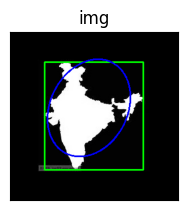

In [18]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import _tools
# 读取图像
img = cv.imread('../data/india.jpg')
# 将图像转换为灰度图像
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 应用阈值处理，将图像转换为二值图像
ret, thresh = cv.threshold(imgray, 127, 255, 0)
# 查找轮廓
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

## 获取第一个轮廓
cnt = contours[0]
# 计算轮廓的矩
M = cv.moments(cnt)

# 长宽比 计算长宽比
x,y,w,h = cv.boundingRect(cnt)
aspect_ratio = float(w)/h
print(aspect_ratio)

# 范围 轮廓矩形和直角矩形的比值
area = cv.contourArea(cnt)
x,y,w,h = cv.boundingRect(cnt)
cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
rect_area = w*h
extent = float(area)/rect_area
print(extent)

# 坚实度 等高线面积与其凸包面积
area = cv.contourArea(cnt)
hull = cv.convexHull(cnt)
hull_area = cv.contourArea(hull)
solidity = float(area)/hull_area
print(solidity)

# 等效直径 等效直径是面积与轮廓面积相同的圆的直径
area = cv.contourArea(cnt)
equi_diameter = np.sqrt(4*area/np.pi)
print(equi_diameter)

# 取向 取向是物体指向的角度
(x,y),(MA,ma),angle = cv.fitEllipse(cnt)
ellipse = cv.fitEllipse(cnt)
cv.ellipse(img,ellipse,(0,0,255),2)
print(angle)

# 掩码和像素点
mask = np.zeros(imgray.shape,np.uint8)
cv.drawContours(mask,[cnt],0,255,-1)
pixelpoints = np.transpose(np.nonzero(mask))
#pixelpoints = cv.findNonZero(mask)
print(pixelpoints)
# for point in pixelpoints:
#     x, y = point
#     cv.circle(img, (x, y), 1, (255, 0,0 ), -1)

# 最大值，最小值和它们的位置
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(imgray,mask = mask)

# 平均颜色或平均强度
mean_val = cv.mean(img,mask = mask)

# 极端点
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

# 显示图像
_tools.plot_image(221, img, "img")

plt.show()

